# Problem 6

In [626]:
hw3 = pd.read_csv("hw3_dataset.txt", delim_whitespace=True, names = ['id', 'funding', 'fv', 'shares', 'l_buyout'])

## 6 A
Trying out EDA

In [630]:
hw3.describe()

,funding,fv,shares,l_buyout
count,482.000000,4.820000e+02,4.820000e+02,482.000000
mean,0.439834,2.651672e+07,2.227942e+06,0.093361
std,0.496883,2.632174e+07,1.413872e+06,0.291240
min,0.000000,1.200000e+06,3.000000e+05,0.000000
25%,0.000000,1.025000e+07,1.300000e+06,0.000000
50%,0.000000,1.950000e+07,2.000000e+06,0.000000
75%,1.000000,3.250000e+07,2.700000e+06,0.000000
max,1.000000,2.346000e+08,1.101862e+07,1.000000


The fv and shares features have really large values compared to l_buyout and funding columns.

In [627]:
hw3.head()

,id,funding,fv,shares,l_buyout
0,1,0,1200000,3000000,0
1,2,0,1454000,1454000,1
2,3,0,1500000,300000,0
3,4,0,1530000,510000,0
4,5,0,2000000,800000,0


In [628]:
"""
we know that id is not giving any useful information
also, we'll check for missing values here
"""

hw3 = hw3.drop('id', axis=1)
nas = hw3.isnull().sum()
print(nas)

funding     0
fv          0
shares      0
l_buyout    0
dtype: int64


There are no missing values in this dataset

In [632]:
features = hw3.drop('funding', axis=1)
target = hw3['funding']

In [633]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=42)

In [634]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322 entries, 157 to 102
Data columns (total 3 columns):
fv          322 non-null int64
shares      322 non-null int64
l_buyout    322 non-null int64
dtypes: int64(3)
memory usage: 10.1 KB


In [635]:
X_train.head()

,fv,shares,l_buyout
157,13000000,1300000,0
449,63000000,4500000,1
118,10103125,1325000,0
114,9625000,1375000,0
439,55000000,2500000,0


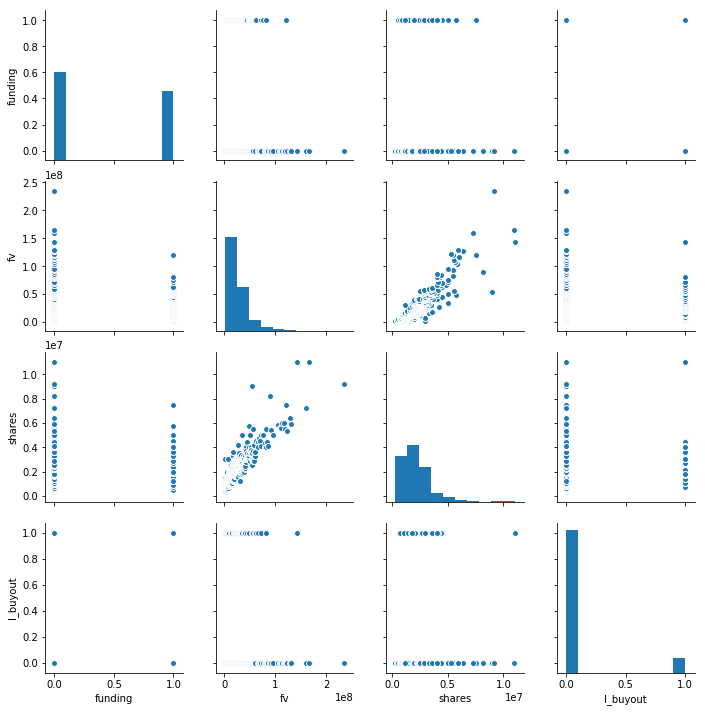

In [653]:
sns.pairplot(hw3, vars=hw3.columns)
plt.show()

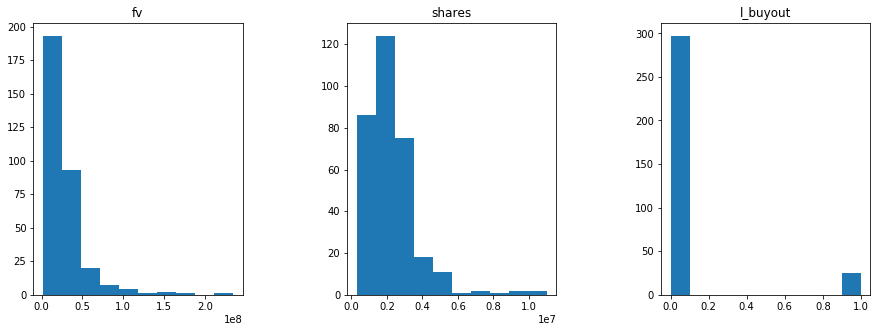

In [644]:
fig, axs = plt.subplots(1,3, figsize=(15, 5), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.5)

for i,j in enumerate(X_train.columns):
    axs[i].hist(X_train[j])
    axs[i].set_title(j)

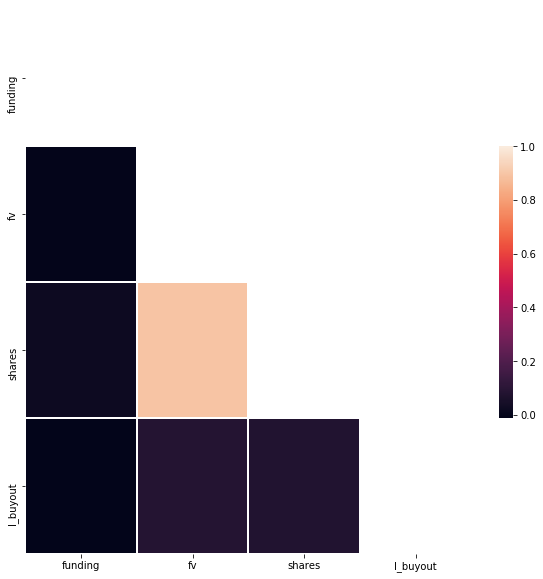

In [649]:
corr = hw3.corr()
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize = (10, 10))
sns.heatmap(corr, mask = mask, xticklabels = 1, 
            yticklabels = 1, linewidths = 1, cbar_kws = {"shrink": .5})

# Inference

In [654]:
X_train.head()

,fv,shares,l_buyout
157,13000000,1300000,0
449,63000000,4500000,1
118,10103125,1325000,0
114,9625000,1375000,0
439,55000000,2500000,0


## 6 B

In [ ]:
X_train['capital'] = np.log(X_train['face_value'] * X_train['n_shares'])
X_validate['capital'] = np.log(X_validate['face_value'] * X_validate['n_shares'])
X_test['capital'] = np.log(X_test['face_value'] * X_test['n_shares'])

X_train['fvl'] = np.log(X_train.face_value)
X_train['nsl'] = np.log(X_train.n_shares)

X_validate['fvl'] = np.log(X_validate.face_value)
X_validate['nsl'] = np.log(X_validate.n_shares)

X_test['fvl'] = np.log(X_test.face_value)
X_test['nsl'] = np.log(X_test.n_shares)


The first thing to try is the log value of the two features which have a positively skewed distr.

In [660]:
X_train['fv_log'] = np.log(X_train['fv'])
X_test['fv_log'] = np.log(X_test['fv'])
X_train['shares_log'] = np.log(X_train['shares'])
X_test['shares_log'] = np.log(X_test['shares'])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [710]:
# method to print basic metrics of a classifier
def print_metrics(y_test, y_hat):
    print("Accuracy of model is ", metrics.accuracy_score(y_test, y_hat))
    print("Precision of model is ", metrics.precision_score(y_test, y_hat))
    print("Recall of model is ", metrics.recall_score(y_test, y_hat))
    print("Confusion matrix\n", metrics.confusion_matrix(y_test, y_hat))

# method to plot AUC
def plot_roc_auc(model, X_test):
    y_hat_probabilities = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_hat_probabilities)
    auc = metrics.roc_auc_score(y_test, y_hat_probabilities)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()

In [711]:
lr = LogisticRegression()
lr.fit(X_train[['fv_log', 'shares_log', 'l_buyout']], y_train)

y_hat = lr.predict(X_test[['fv_log', 'shares_log', 'l_buyout']])
print_metrics(y_test, y_hat)

Accuracy of model is  0.5625
Precision of model is  0.43333333333333335
Recall of model is  0.41935483870967744
Confusion matrix
 [[64 34]
 [36 26]]


So, that's an okayish accuracy. We just tried all variables we thought would work. Let's try plotting the Area under curve.

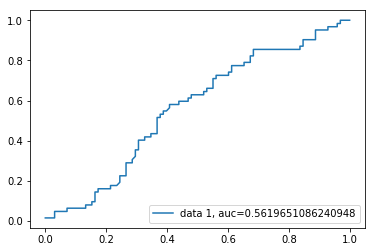

In [712]:
plot_roc_auc(lr, X_test[['fv_log', 'shares_log', 'l_buyout']])

Let's try more feature transformation. Since face_value and number of shares are highly correlated in stock market, it's worth trying. Moreover, there's no point in using two highly correlated features in building a model. the correlation between them is greater than 0.8. I will multiply them and then take a log over the multiplied quantity.

In [713]:
# All the values are greater than 0 so no need to do log(p+1) as shown in class.

X_train['stock_value'] = np.log((X_train['fv'] * X_train['shares']))
X_test['stock_value'] = np.log((X_test['fv'] * X_test['shares']))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [714]:
lr = LogisticRegression()
lr.fit(X_train[['stock_value', 'l_buyout']], y_train)

y_hat = lr.predict(X_test[['stock_value', 'l_buyout']])
print_metrics(y_test, y_hat)

Accuracy of model is  0.55625
Precision of model is  0.0
Recall of model is  0.0
Confusion matrix
 [[89  9]
 [62  0]]


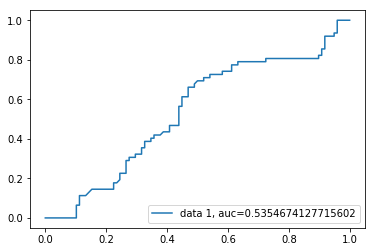

In [715]:
plot_roc_auc(lr, X_test[['stock_value', 'l_buyout']])

Didn't give a significant improvement. Logistic regression has different solver so will try a different solver.

In [736]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train[['stock_value', 'l_buyout']], y_train)

y_hat = lr.predict(X_test[['stock_value', 'l_buyout']])
print_metrics(y_test, y_hat)

Accuracy of model is  0.55
Precision of model is  0.4074074074074074
Recall of model is  0.3548387096774194
Confusion matrix
 [[66 32]
 [40 22]]


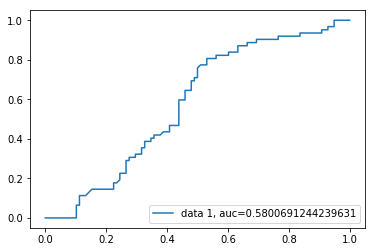

In [717]:
plot_roc_auc(lr, X_test[['stock_value', 'l_buyout']])

Though it didn't improve significantly, it is definitely better than the previous model.

## 6 C

Now, we try another kind of classifier- LDA. Again following a similar approach, let's start with all features and slowly narrow down to the ones which we found useful from our logistic regression model.

In [718]:
lda = sklearn_lda()
lda.fit(X_train[['fv_log', 'shares_log', 'l_buyout']], y_train)

y_hat = lda.predict(X_test[['fv_log', 'shares_log', 'l_buyout']])
print_metrics(y_test, y_hat)

Accuracy of model is  0.575
Precision of model is  0.45
Recall of model is  0.43548387096774194
Confusion matrix
 [[65 33]
 [35 27]]


Now, trying the enhanced version:

In [719]:
lda = sklearn_lda()
lda.fit(X_train[['stock_value', 'l_buyout']], y_train)

y_hat = lda.predict(X_test[['stock_value', 'l_buyout']])
print_metrics(y_test, y_hat)

Accuracy of model is  0.55
Precision of model is  0.4074074074074074
Recall of model is  0.3548387096774194
Confusion matrix
 [[66 32]
 [40 22]]


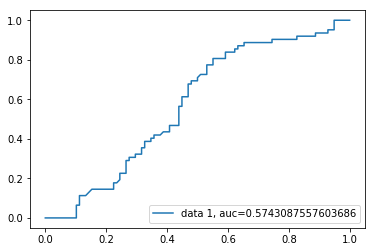

In [720]:
plot_roc_auc(lda, X_test[['stock_value', 'l_buyout']])

In [731]:
lda = sklearn_lda(solver='svd')
lda.fit(X_train[['stock_value', 'l_buyout']], y_train)

y_hat = lda.predict(X_test[['stock_value', 'l_buyout']])
print_metrics(y_test, y_hat)

Accuracy of model is  0.55
Precision of model is  0.4074074074074074
Recall of model is  0.3548387096774194
Confusion matrix
 [[66 32]
 [40 22]]


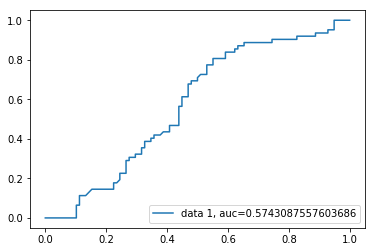

In [732]:
plot_roc_auc(lda, X_test[['stock_value', 'l_buyout']])

Let's even test the training accuracy of our model

In [723]:
y_hat_train = lda.predict(X_train[['stock_value', 'l_buyout']])
print_metrics(y_train, y_hat_train)

Accuracy of model is  0.5807453416149069
Precision of model is  0.5619834710743802
Recall of model is  0.4533333333333333
Confusion matrix
 [[119  53]
 [ 82  68]]


Here, we observe again that feature transformation provides better AUC compared to fitting the model on the original features. However, changing solver here didn't make any difference.

## 6 D

Let's try finding training accuracies:  
a) Logistic regression

Accuracy of model is  0.5745341614906833
Precision of model is  0.5546218487394958
Recall of model is  0.44
Confusion matrix
 [[119  53]
 [ 84  66]]


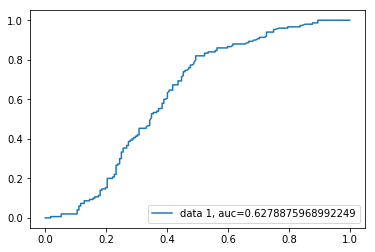

In [725]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train[['stock_value', 'l_buyout']], y_train)

y_hat_train = lr.predict(X_train[['stock_value', 'l_buyout']])
print_metrics(y_train, y_hat_train)

y_hat_probabilities = lr.predict_proba(X_train[['stock_value', 'l_buyout']])[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train,  y_hat_probabilities)
auc = metrics.roc_auc_score(y_train, y_hat_probabilities)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Accuracy of model is  0.5838509316770186
Precision of model is  0.5634920634920635
Recall of model is  0.47333333333333333
Confusion matrix
 [[117  55]
 [ 79  71]]


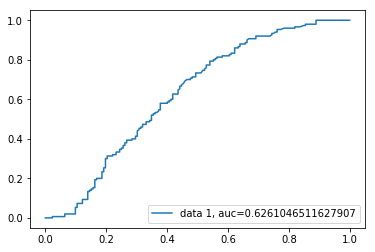

In [727]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train[['fv_log', 'l_buyout', 'shares_log']], y_train)

y_hat_train = lr.predict(X_train[['fv_log', 'l_buyout', 'shares_log']])
print_metrics(y_train, y_hat_train)

y_hat_probabilities = lr.predict_proba(X_train[['fv_log', 'l_buyout', 'shares_log']])[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train,  y_hat_probabilities)
auc = metrics.roc_auc_score(y_train, y_hat_probabilities)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

b) Linear Discriminant Analysis

Accuracy of model is  0.5807453416149069
Precision of model is  0.5619834710743802
Recall of model is  0.4533333333333333
Confusion matrix
 [[119  53]
 [ 82  68]]


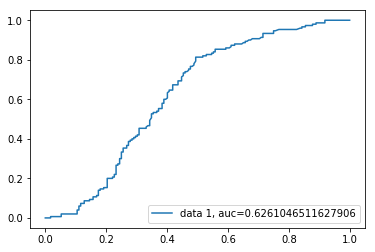

In [737]:
lda = sklearn_lda(solver='svd')
lda.fit(X_train[['stock_value', 'l_buyout']], y_train)

y_hat_train = lda.predict(X_train[['stock_value', 'l_buyout']])
print_metrics(y_train, y_hat_train)

y_hat_probabilities = lda.predict_proba(X_train[['stock_value', 'l_buyout']])[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train,  y_hat_probabilities)
auc = metrics.roc_auc_score(y_train, y_hat_probabilities)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Accuracy of model is  0.5900621118012422
Precision of model is  0.5671641791044776
Recall of model is  0.5066666666666667
Confusion matrix
 [[114  58]
 [ 74  76]]


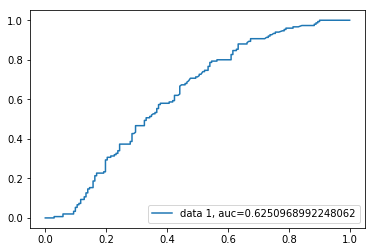

In [738]:
lda = sklearn_lda(solver='svd')
lda.fit(X_train[['fv_log', 'l_buyout', 'shares_log']], y_train)

y_hat_train = lda.predict(X_train[['fv_log', 'l_buyout', 'shares_log']])
print_metrics(y_train, y_hat_train)

y_hat_probabilities = lda.predict_proba(X_train[['fv_log', 'l_buyout', 'shares_log']])[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train,  y_hat_probabilities)
auc = metrics.roc_auc_score(y_train, y_hat_probabilities)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Here I tested out traning accuracies in my model.